# Importing Libraries

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.io
import copy

plt.rcParams['figure.figsize'] = [8,4]

# Importing Yale Faces Database from .mat file

In [2]:
data = scipy.io.loadmat('.\\YaleFaceDataBase\\Yale_64x64.mat')
print(type(data))

<class 'dict'>


# Dictonary to python List

In [3]:
data_list = list(data['fea'])

# Python List to Numpy Array

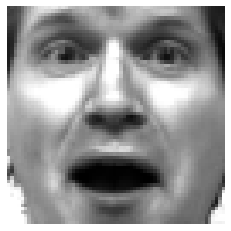

(4096, 165)


In [4]:
A = np.array(data_list).T
img = plt.imshow(A[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()
print(A.shape)

# Calculating A-M

(4096, 165)


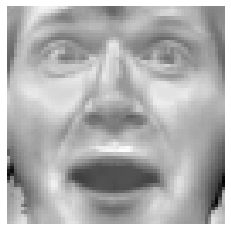

In [5]:
Amean = A.mean(axis=1,keepdims=True)
Am = A - Amean
print(Am.shape)
img = plt.imshow(Am[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Calculating SVD

In [6]:
U,D,Vt = np.linalg.svd(Am)            # Complete SVD i.e. calculation corresponding to zero singular values also included   --> Slower

# U,D,Vt = np.linalg.svd(Am, full_matrices=False)    # Economy SVD i.e. Calculations corresponding to zero singular values are not done -->Faster

D = np.diag(D)

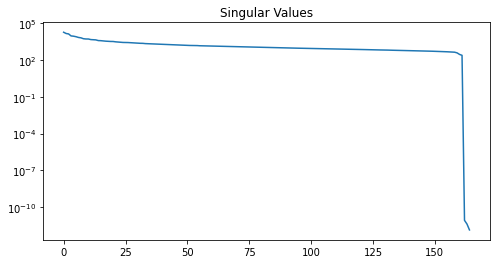

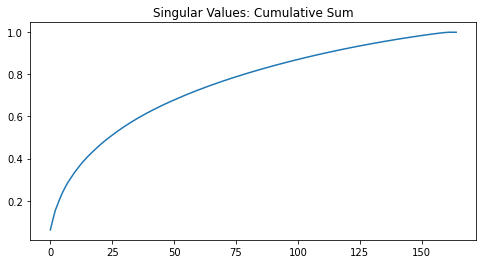

In [7]:

plt.figure(1)
plt.semilogy(np.diag(D[:,:]))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(D))/np.sum(np.diag(D)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

# In Sample Projection and Prediction

In [8]:
sample_size = 150

def InSampleProjectionAndReconstruction(image_number):
    
    j = 0

    for r in (50, 100, 200, 500, 800, 2000, 4096):
       
        # Construct approximate image
        u = U[:,:r]
        
        # Projection
        A_train_model = np.matmul(u.T,A[:,:sample_size])

        # Reconstruction
        A_train_pred = np.matmul(u,A_train_model)
        Fimg = A_train_pred 

        plt.figure(j+1)
        j += 1
        
        plot1 = plt.subplot(121)
        img =  plt.imshow(A[:,image_number].reshape(64,64).transpose())
        img.set_cmap('gray')
        plt.title(f'Original Image (r = {r})')
        plt.axis('off')
        
        plot2 = plt.subplot(122)
        img2 = plt.imshow(Fimg[:,image_number].reshape(64,64).transpose())
        img2.set_cmap('gray')
        plt.axis('off')
        plt.title(f'Approximate Image (r = {r})')
        plt.show()  

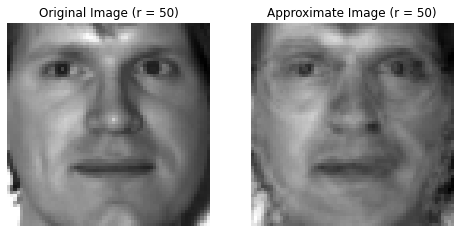

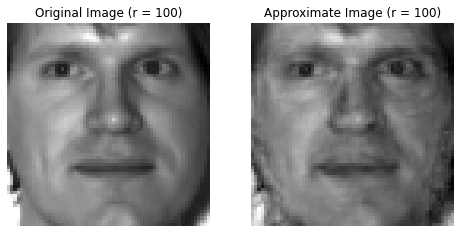

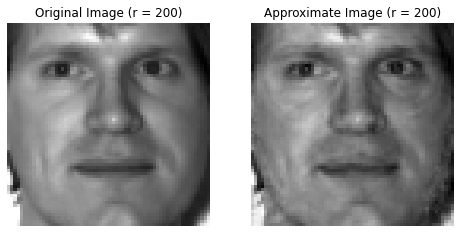

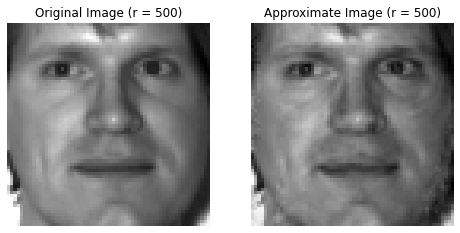

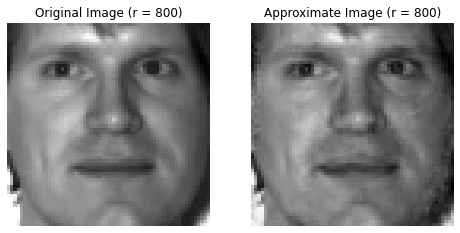

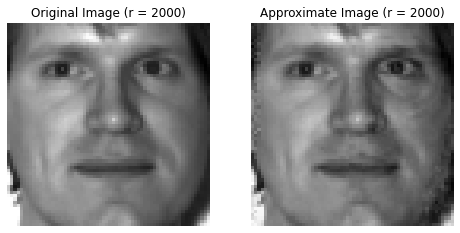

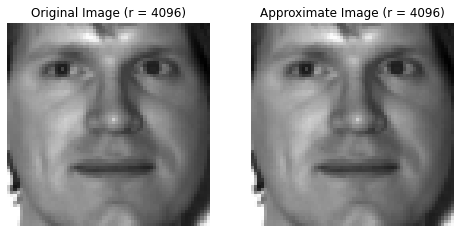

In [9]:
InSampleProjectionAndReconstruction(0)

# Out off Sample Projection and Prediction

In [10]:
def outOffSampleProjectionAndReconstruction(image_number):
    if(image_number>=sample_size):
        j = 0
        for r in (50, 100, 200, 500, 800, 2000,4096):
            
            # Construct approximate image
            u = U[:,:r]
            
            # Projection
            A_test_model = np.matmul(u.T,A[:,image_number])

            # Reconstruction
            A_test_pred = np.matmul(u,A_test_model)
            Fimg = A_test_pred 

            plt.figure(j+1)
            j += 1
            
            plt.subplot(121)
            img =  plt.imshow(A[:,image_number].reshape(64,64).transpose() )
        
            img.set_cmap('gray')
            plt.axis('off')
            plt.title(f'Original Image (r = {r})')  
            
            plt.subplot(122)
            img2 = plt.imshow(Fimg.reshape(64,64).transpose())
            img2.set_cmap('gray')
            plt.axis('off')
            plt.title(f'Approximate Image (r = {r})')
            plt.show()
        
    else:
            print("Object Belongs to Sample")

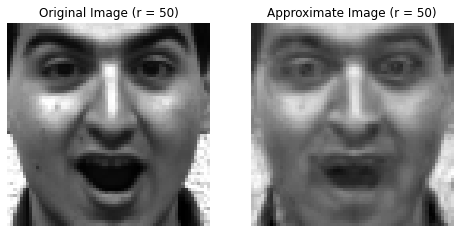

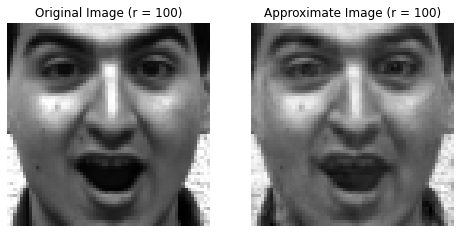

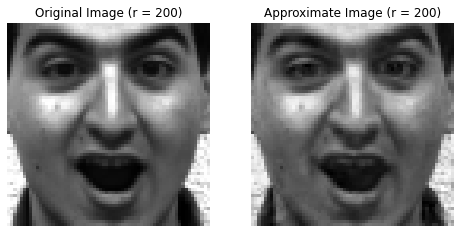

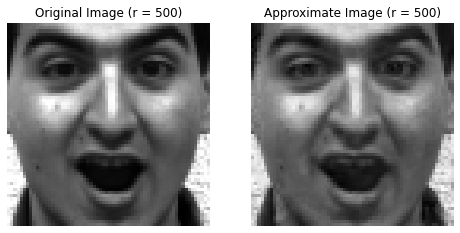

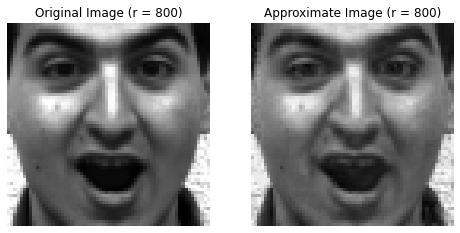

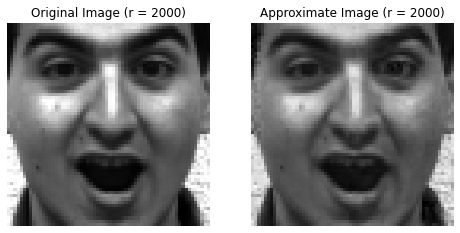

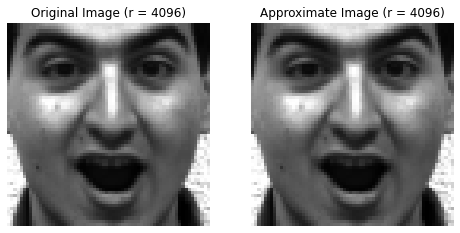

In [11]:
outOffSampleProjectionAndReconstruction(155)

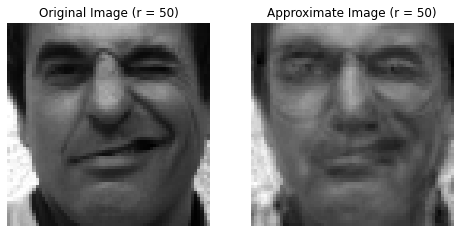

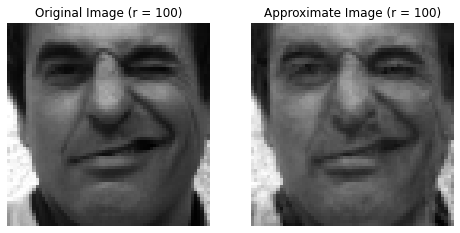

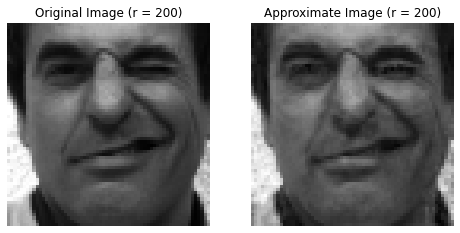

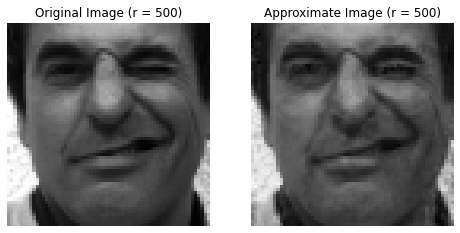

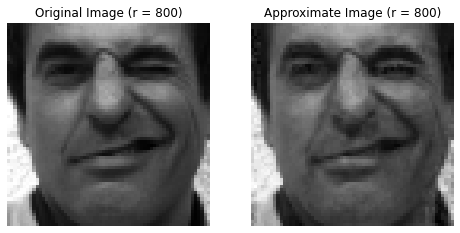

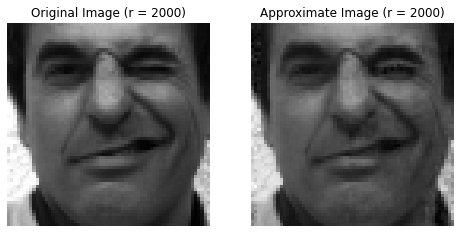

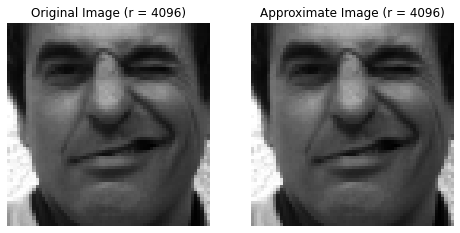

In [12]:
InSampleProjectionAndReconstruction(123)

In [13]:
outOffSampleProjectionAndReconstruction(123)

Object Belongs to Sample
